In [1]:
!pip install pandas matplotlib seaborn

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSVs
plain_df = pd.read_csv('plain_metrics.csv')
trad_df = pd.read_csv('trad_obfuscation_metrics.csv')

# Merge on Filename
merged = pd.merge(plain_df, trad_df, on='Filename', suffixes=('_plain', '_trad'))
merged_df = merged.head(100)
# Set style
sns.set(style="whitegrid")


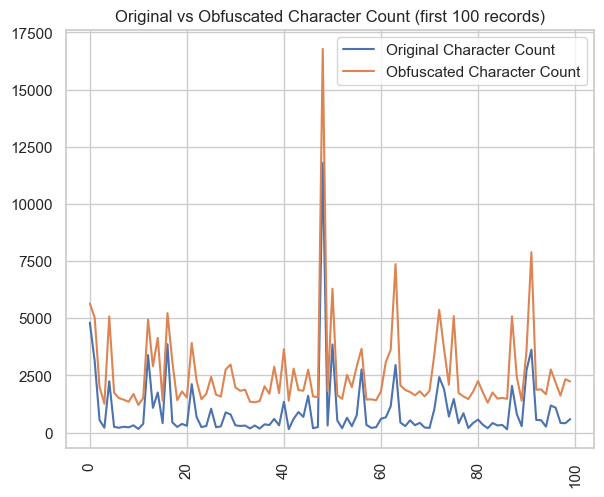

In [26]:
# 1. OriginalLength vs ObfuscatedLength
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Use index for x-axis
x = merged_df.index
y1 = merged_df['OriginalLength_plain']
y2 = merged_df['ObfuscatedLength']

sns.set(style='whitegrid')
plt.figure(figsize=(15, 25))

# 1. OriginalLength (plain) vs ObfuscatedLength (trad)
plt.subplot(4, 2, 1)
plt.plot(x, y1, label='Original Character Count', linestyle='-')
plt.plot(x, y2, label='Obfuscated Character Count', linestyle='-')
plt.xticks(rotation=90)
plt.title('Original vs Obfuscated Character Count (first 100 records)')
plt.legend()


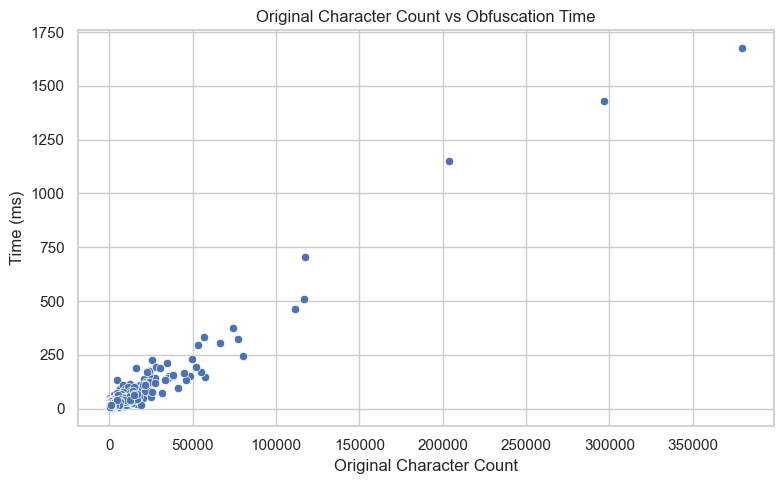

In [27]:
# 2. OriginalLength vs TimeMs (scatter)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=merged['OriginalLength_plain'], y=merged['TimeMs'])
plt.title('Original Character Count vs Obfuscation Time')
plt.xlabel('Original Character Count')
plt.ylabel('Time (ms)')
plt.tight_layout()
plt.show()

In [7]:
print(merged_df.head())

         Filename  OriginalLength_plain  ReadabilityScore_plain  \
0       func_1.js                  4810                     434   
1     func_100.js                  3123                     425   
2  func_100000.js                   547                      91   
3  func_100002.js                   215                      39   
4  func_100003.js                  2247                     304   

   CyclomaticComplexity_plain  VariableEntropy_plain  OriginalLength_trad  \
0                          10                  5.338                 4810   
1                           7                  5.003                 3123   
2                           1                  3.321                  547   
3                           2                  2.162                  215   
4                           7                  4.965                 2247   

   ObfuscatedLength  TimeMs  ReadabilityScore_trad  CyclomaticComplexity_trad  \
0              5645  134.22                   1209   

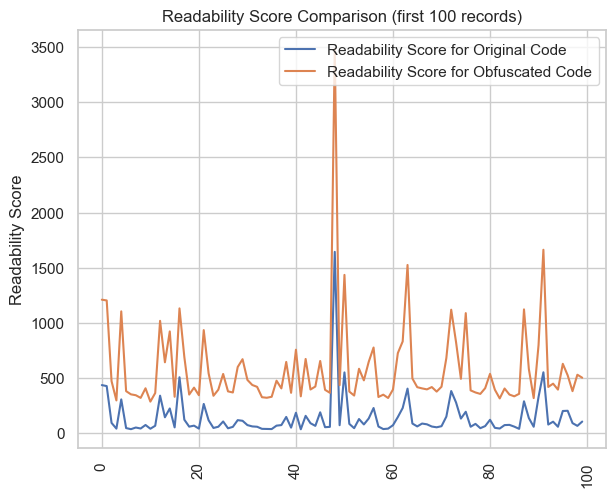

In [28]:
# Use index for x-axis
x = merged_df.index
y1 = merged_df['ReadabilityScore_plain']
y2 = merged_df['ReadabilityScore_trad']

sns.set(style='whitegrid')
plt.figure(figsize=(15, 25))

# 1. OriginalLength (plain) vs ObfuscatedLength (trad)
plt.subplot(4, 2, 1)
plt.plot(x, y1, label='Readability Score for Original Code', linestyle='-')
plt.plot(x, y2, label='Readability Score for Obfuscated Code', linestyle='-')
plt.xticks(rotation=90)
plt.ylabel('Readability Score')
plt.title('Readability Score Comparison (first 100 records)')
plt.legend()



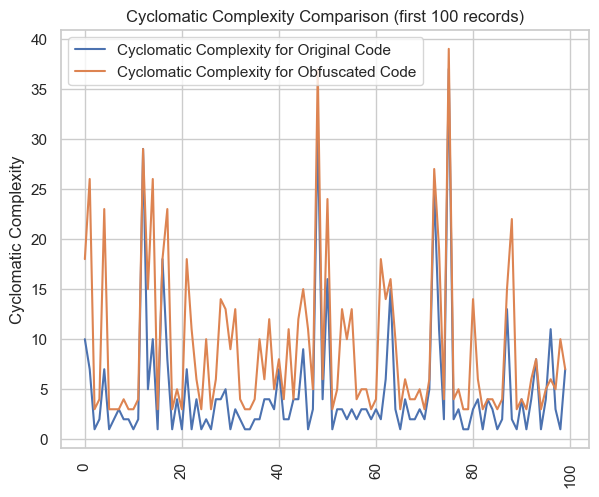

In [29]:

# Use index for x-axis
x = merged_df.index
y1 = merged_df['CyclomaticComplexity_plain']
y2 = merged_df['CyclomaticComplexity_trad']

sns.set(style='whitegrid')
plt.figure(figsize=(15, 25))

# 1. OriginalLength (plain) vs ObfuscatedLength (trad)
plt.subplot(4, 2, 1)
plt.plot(x, y1, label='Cyclomatic Complexity for Original Code', linestyle='-')
plt.plot(x, y2, label='Cyclomatic Complexity for Obfuscated Code', linestyle='-')
plt.xticks(rotation=90)
plt.ylabel('Cyclomatic Complexity')
plt.title('Cyclomatic Complexity Comparison (first 100 records)')
plt.legend()



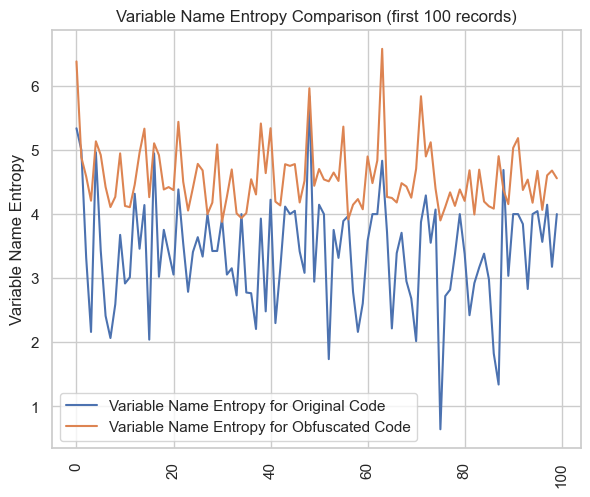

In [30]:
# 5. VariableEntropy comparison
# Use index for x-axis
x = merged_df.fillna(0).index
y1 = merged_df.fillna(4)['VariableEntropy_plain']
y2 = merged_df.fillna(4)['VariableEntropy_trad']

sns.set(style='whitegrid')
plt.figure(figsize=(15, 25))

# 1. OriginalLength (plain) vs ObfuscatedLength (trad)
plt.subplot(4, 2, 1)
plt.plot(x, y1, label='Variable Name Entropy for Original Code', linestyle='-')
plt.plot(x, y2, label='Variable Name Entropy for Obfuscated Code', linestyle='-')
plt.xticks(rotation=90)
plt.ylabel('Variable Name Entropy')
plt.title('Variable Name Entropy Comparison (first 100 records)')
plt.legend()




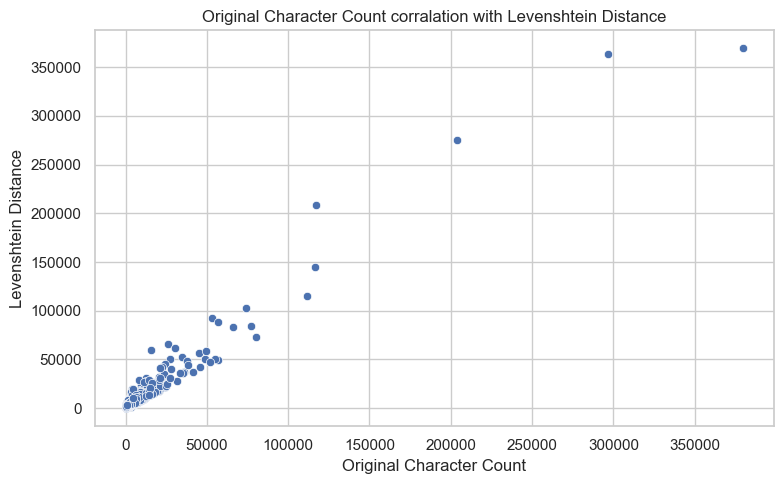

In [31]:
# 6. OriginalLength vs LevenshteinDistance (scatter)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=merged['OriginalLength_plain'], y=merged['LevenshteinDistance'])
plt.title('Original Character Count corralation with Levenshtein Distance')
plt.xlabel('Original Character Count')
plt.ylabel('Levenshtein Distance')
plt.tight_layout()
plt.show()


In [32]:
merged = merged.dropna()

In [34]:
avg_length_increase = (merged['ObfuscatedLength'] - merged['OriginalLength_plain']).mean()
avg_readability_increase = (merged['ReadabilityScore_trad'] - merged['ReadabilityScore_plain']).mean()
avg_complexity_increase = (merged['CyclomaticComplexity_trad'] - merged['CyclomaticComplexity_plain']).mean()
avg_entropy_increase = (merged['VariableEntropy_trad'] - merged['VariableEntropy_plain']).mean()

In [35]:
length_pct = ((merged['ObfuscatedLength'] - merged['OriginalLength_plain']) / merged['OriginalLength_plain']).mean() * 100
readability_pct = ((merged['ReadabilityScore_trad'] - merged['ReadabilityScore_plain']) / merged['ReadabilityScore_plain']).mean() * 100
complexity_pct = ((merged['CyclomaticComplexity_trad'] - merged['CyclomaticComplexity_plain']) / merged['CyclomaticComplexity_plain']).mean() * 100
entropy_pct = ((merged['VariableEntropy_trad'] - merged['VariableEntropy_plain']) / merged['VariableEntropy_plain']).mean() * 100

In [36]:
print(f"Average Length Increase: {avg_length_increase:.2f} chars ({length_pct:.2f}%)")
print(f"Average Readability Score Change: {avg_readability_increase:.2f} ({readability_pct:.2f}%)")
print(f"Average Cyclomatic Complexity Change: {avg_complexity_increase:.2f} ({complexity_pct:.2f}%)")
print(f"Average Variable Entropy Change: {avg_entropy_increase:.2f} ({entropy_pct:.2f}%)")

Average Length Increase: 1580.68 chars (371.15%)
Average Readability Score Change: 414.60 (489.20%)
Average Cyclomatic Complexity Change: 4.07 (156.15%)
Average Variable Entropy Change: 1.22 (42.48%)


In [37]:
print(merged['LevenshteinDistance'].mean())

2190.7687637307768
